In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df = df.drop('Loan_ID', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='count'>

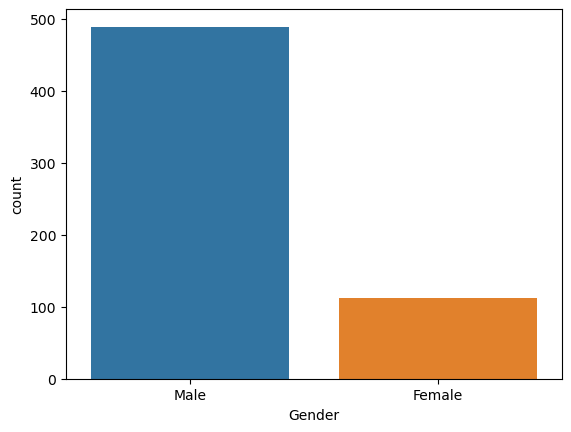

In [10]:
sns.countplot(x=df['Gender'])

In [11]:
df['LoanAmount'].isnull().sum()

22

In [12]:
df['LoanAmount'] = df.groupby('Education')['LoanAmount'].transform(lambda x: x.fillna(x.median()))

In [13]:
df['LoanAmount'].isnull().sum()

0

In [14]:
df['Credit_History'] = df.groupby('Loan_Status')['Credit_History'].transform(lambda x: x.fillna(x.mode()[0]))
df['Credit_History'].isnull().sum()

0

In [15]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [18]:
df['Self_Employed'] = df.groupby('Education')['Self_Employed'].transform(lambda x: x.fillna(x.mode()[0]))

In [19]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [20]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.replace({
    'Loan_Status':{'N' : 0, 'Y':1},
    'Gender': {'Male':0, 'Female':1},
    'Education': {'Not Graduate':0, 'Graduate':1},
    'Married':{'No':0, 'Yes':1},
    'Self_Employed': {'No':0, 'Yes':1}
}, inplace= True)

In [23]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,132.0,360.0,1.0,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [24]:
# Get dummies for Property_Area and Dependents
df_dummies = pd.get_dummies(df[['Property_Area', 'Dependents']], drop_first=True)

# Concatenate with original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Optionally drop original categorical columns
df.drop(['Property_Area', 'Dependents'], axis=1, inplace=True)

df = df.astype(int)

In [25]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0,132,360,1,1,0,1,0,0,0
1,0,1,1,0,4583,1508,128,360,1,0,0,0,1,0,0
2,0,1,1,1,3000,0,66,360,1,1,0,1,0,0,0
3,0,1,0,0,2583,2358,120,360,1,1,0,1,0,0,0
4,0,0,1,0,6000,0,141,360,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0
610,0,1,1,0,4106,0,40,180,1,1,0,0,0,0,1
611,0,1,1,0,8072,240,253,360,1,1,0,1,1,0,0
612,0,1,1,0,7583,0,187,360,1,1,0,1,0,1,0


In [27]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



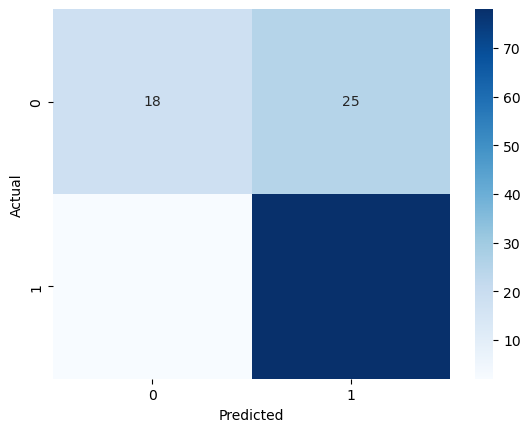

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



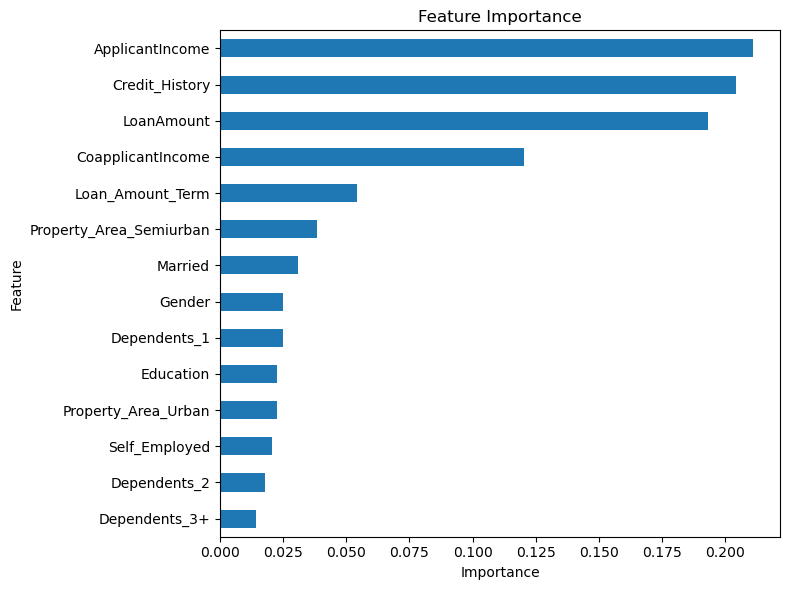

In [33]:

import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plot
feature_importances.plot(
    x='Feature',
    y='Importance',
    kind='barh',
    legend=False,
    figsize=(8, 6)
)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


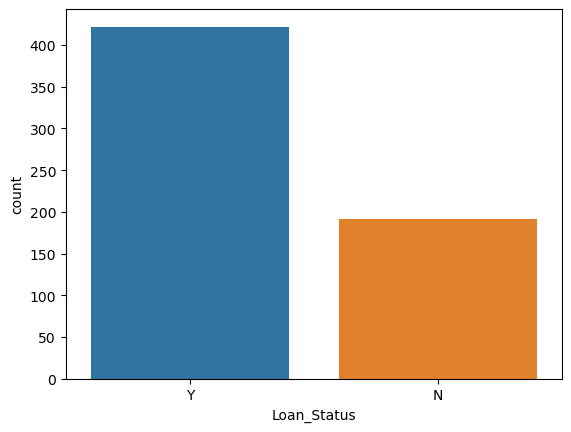

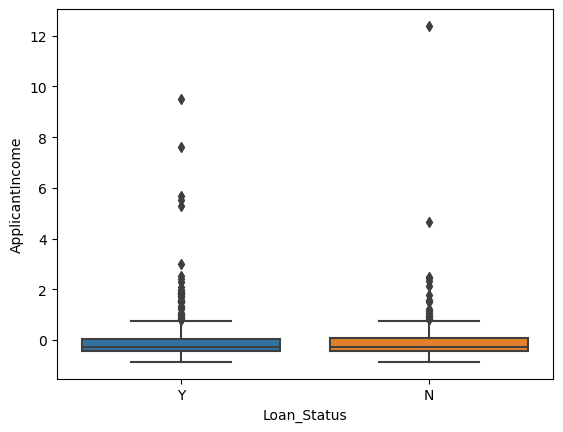

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status',data=df)
plt.show()
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)
plt.show()

In [34]:
import pickle
import os
import pickle
pickle.dump(model, open("model2/model.pkl", "wb"))  # saves inside a folder named 'models'



In [35]:
features = X_train.columns.tolist()
pickle.dump(features, open("model2/features.pkl", "wb"))
print("✅ Feature list saved as features.pkl")

✅ Feature list saved as features.pkl
